In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
game_info = pd.read_csv('data/game_info.csv', encoding = "ISO-8859-1")
game_feat = pd.read_csv('data/games_features.csv')

In [3]:
game_feat.head(3)

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


In [4]:
game_info.head(3)

,appid,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,appid.1,Developer
0,63942,Men of War: Vietnam Special Edition Upgrade Pack,dlc,2.99,1970-01-01 00:00:00,-1,0,1,63942,1C Company
1,414120,Modbox,game,14.99,2016-04-05 00:00:00,-1,0,0,414120,Alientrap
2,363020,IPackThat,game,64.99,2015-10-06 00:00:00,-1,0,0,363020,Piranha Bytes Distribution UG&Co KG


Let's do some EDA on the data. First I will check which game developers/publishers are the most popular

In [5]:
# Removes all '\N' (null values) of games that have a null developer, we also want to see only the game developers that have more than 10 games
game_info_no_dlc = game_info[ (game_info['Type'] == 'game') & (game_info['Developer'] != '\\N')]
game_info_no_dlc = game_info_no_dlc[game_info_no_dlc.groupby(['Developer'])['Developer'].transform('count') > 10]
game_info_no_dlc.head(10)

,appid,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,appid.1,Developer
11,363050,Let's Explore the Airport (Junior Field Trips),game,6.99,2015-04-24 00:00:00,-1,0,0,363050,Humongous Entertainment
19,350310,BLADESTORM: Nightmare,game,59.99,2015-05-28 00:00:00,-1,0,0,350310,"KOEI TECMO GAMES CO., LTD."
35,4780,Medieval II: Total War Kingdoms,game,11.99,2007-11-27 00:00:00,85,0,1,4780,Feral Interactive (Linux)
36,4780,Medieval II: Total War Kingdoms,game,11.99,2007-11-27 00:00:00,85,0,1,4780,Feral Interactive (Mac)
43,65980,Sid Meier's Civilization®: Beyond Earth,game,39.99,2014-10-23 00:00:00,81,0,1,65980,Firaxis Games
55,299110,Theatre Of The Absurd,game,4.99,2014-05-08 00:00:00,-1,0,0,299110,Gogii Games
83,273740,Extreme Roads USA,game,9.99,2014-06-06 00:00:00,-1,0,0,273740,United Independent Entertainment GmbH
103,242050,Assassins Creed® IV Black Flag,game,29.99,2013-11-19 00:00:00,-1,18,1,242050,Ubisoft Montreal
105,4580,"Warhammer® 40,000: Dawn of War® - Dark Crusade",game,12.99,2007-08-07 00:00:00,87,17,1,4580,Relic Entertainment
128,285520,Sledgehammer / Gear Grinder,game,7.99,2014-03-12 00:00:00,-1,0,1,285520,Targem Games


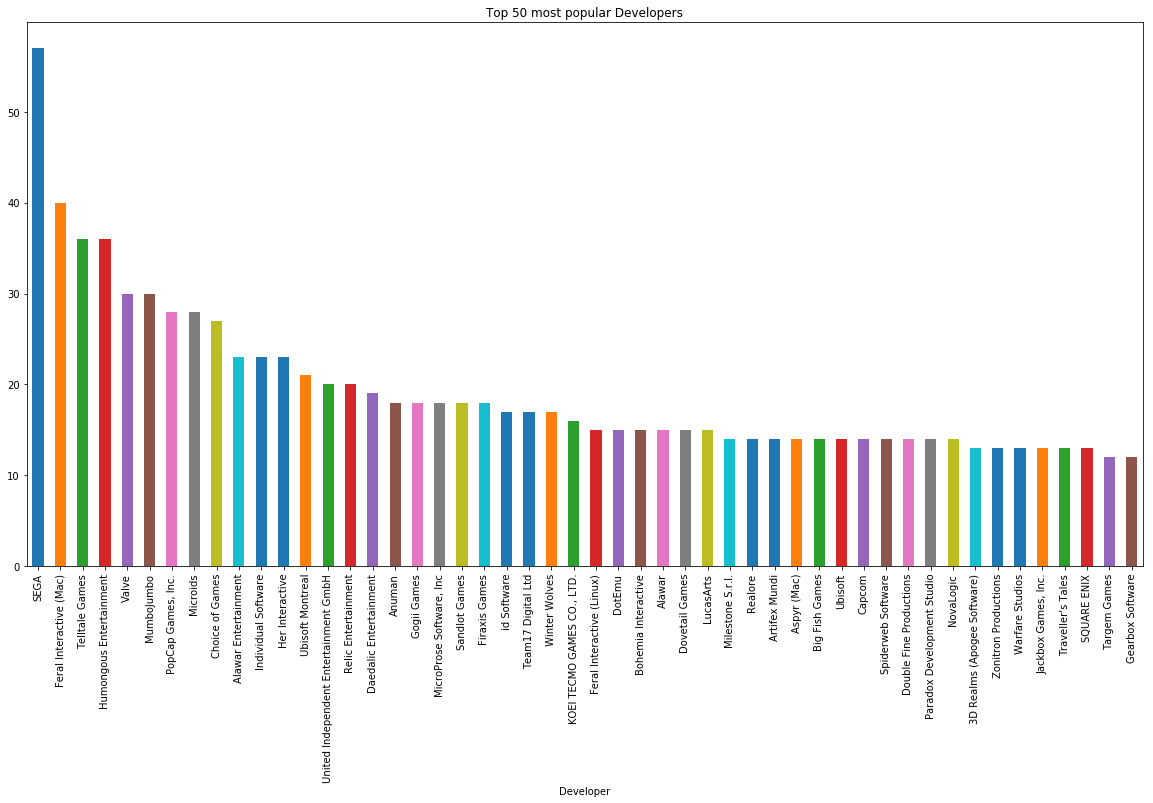

In [6]:
# Plot the top 50 most popular developers and their game count
plt.figure(figsize=(20,10))
_ = game_info_no_dlc.groupby(['Developer'])['Developer'].count().sort_values(ascending=False).head(50).plot.bar()
_ = plt.title("Top 50 most popular Developers")

In [7]:
# Here we will join the two datasets of features and developer info
game_info_no_dlc.merge(right=game_feat, how='inner', left_on='appid', right_on='QueryID').head(10)

,appid,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer,appid.1,Developer,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,363050,Let's Explore the Airport (Junior Field Trips),game,6.99,2015-04-24 00:00:00,-1,0,0,363050,Humongous Entertainment,...,,,English**languages with full audio support,http://www.humongous.com,Minimum:OS: Windows XP / Vista / 7Processor: 1...,Recommended:OS: Windows 7Processor: 1.5 GHz Pr...,Minimum:OS: Ubuntu 14.04 LTSProcessor: 1.0 GHz...,Recommended:OS: Ubuntu 14.04 LTSProcessor: 1.5...,Minimum:OS: OS X Leopard 10.7Processor: 1.0 GH...,Recommended:OS: OS X Leopard 10.7 or newerProc...
1,350310,BLADESTORM: Nightmare,game,59.99,2015-05-28 00:00:00,-1,0,0,350310,"KOEI TECMO GAMES CO., LTD.",...,(c)2015 KOEI TECMO GAMES CO. LTD. All rights r...,,English* Japanese**languages with full audio s...,http://www.koeitecmoamerica.com/bladestormnigh...,Minimum:OS: Windows Vista/7/8/8.1 (64bit requi...,Recommended:OS: Windows Vista/7/8/8.1 (64bit r...,,,,
2,4780,Medieval II: Total War Kingdoms,game,11.99,2007-11-27 00:00:00,85,0,1,4780,Feral Interactive (Linux),...,,,English,http://www.totalwar.com/,Minimum: Supported OS: Windows 2000/XPProcesso...,,OS: Ubuntu 14.04 Steam OS 2.0 (NVIDIA & Intel ...,OS: Ubuntu 15.10Steam OS 2.0 (NVIDIA & Intel O...,OS: 10.10.5Processor: 1.8 GHz RAM: 4 GB Graphi...,OS: 10.11.2Processor: 2.4 GHz RAM: 4 GB Graphi...
3,4780,Medieval II: Total War Kingdoms,game,11.99,2007-11-27 00:00:00,85,0,1,4780,Feral Interactive (Mac),...,,,English,http://www.totalwar.com/,Minimum: Supported OS: Windows 2000/XPProcesso...,,OS: Ubuntu 14.04 Steam OS 2.0 (NVIDIA & Intel ...,OS: Ubuntu 15.10Steam OS 2.0 (NVIDIA & Intel O...,OS: 10.10.5Processor: 1.8 GHz RAM: 4 GB Graphi...,OS: 10.11.2Processor: 2.4 GHz RAM: 4 GB Graphi...
4,65980,Sid Meier's Civilization®: Beyond Earth,game,39.99,2014-10-23 00:00:00,81,0,1,65980,Firaxis Games,...,(c) 1991-2014 Take-Two Interactive Software an...,A must play for strategy fans9 out of 10 - GAM...,English* French* Italian* German* Spanish* Jap...,http://www.civilization.com/,Minimum:OS: Windows(r) Vista SP2/ Windows(r) 7...,Recommended:OS: Windows(r) Vista SP2 / Windows...,Minimum:OS: SteamOS Ubuntu 14.04Processor: Int...,,Minimum:OS: 10.9.5 (Mavericks) 10.10 (Yosemite...,
5,299110,Theatre Of The Absurd,game,4.99,2014-05-08 00:00:00,-1,0,0,299110,Gogii Games,...,,,English**languages with full audio support,http://www.gogiigames.com/games/theatre-absurd...,Minimum:OS: Windows XP/Vista/7Processor: 1.0 G...,,,,,
6,273740,Extreme Roads USA,game,9.99,2014-06-06 00:00:00,-1,0,0,273740,United Independent Entertainment GmbH,...,(c) 2014 UIG ENTERTAINMENT GMBH. All rights re...,,English German,http://www.uieg.de/,Minimum:OS: Windows Vista 7 or 8Processor: Int...,Recommended:OS: Windows 7 or 8Processor: Intel...,,,Minimum:OS: Max OSX 10.6 (Snow Leopard) or hig...,Recommended:OS: MAC OSX 10.8 (Mountain Lion) o...
7,242050,Assassins Creed® IV Black Flag,game,29.99,2013-11-19 00:00:00,-1,18,1,242050,Ubisoft Montreal,...,(c) 2013 Ubisoft Entertainment. All Rights Res...,,English* French* Italian* German* Spanish* Cze...,http://www.assassinscreed.com,Minimum:OS: Windows Vista SP2 or Windows 7 SP1...,Recommended:OS: Windows Vista SP2 or Windows 7...,,,,
8,4580,"Warhammer® 40,000: Dawn of War® - Dark Crusade",game,12.99,2007-08-07 00:00:00,87,17,1,4580,Relic Entertainment,...,Warhammer 40000 Dawn of War Dark Crusade -- Co...,,English French German Italian Spanish,http://www.dawnofwar.com,Minimum: Windows 2000/XP 2.0 Ghz Intel Pentiu...,,,,,
9,285520,Sledgehammer / Gear Grinder,game,7.99,2014-03-12 00:00:00,-1,0,1,285520,Targem Games,...,(c)2014 Buka Limited All rights reserved. Paci...,18 Wheels of Steel + Carmageddon = Whee!Rock P...,English* German Spanish Russian* French Italia...,http://www.buka.ru,Minimum:OS: Vista/XP/2000/7/8Processor: Pentiu...,Recommended:OS: Vista/